In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Honeybee colony loss dataset

In [2]:
# acquire data
df = pd.read_excel('bee_colony_loss.xlsx')

In [3]:
df.head()

,Year,Season,State,Total Annual Loss,Beekeepers,Beekeepers Exclusive to State,Colonies,Colonies Exclusive to State
0,2016/17,Annual,Massachusetts,0.159,87,0.943,27186,0.023
1,2016/17,Annual,Montana,0.171,21,0.524,35905,0.003
2,2016/17,Annual,Nevada,0.230,13,0.923,2512,0.052
3,2016/17,Annual,Maine,0.233,65,0.938,41102,0.014
4,2016/17,Annual,Wyoming,0.234,18,0.778,6521,0.014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            365 non-null    object 
 1   Season                          365 non-null    object 
 2    State                          365 non-null    object 
 3    Total Annual Loss              349 non-null    float64
 4    Beekeepers                     365 non-null    int64  
 5    Beekeepers Exclusive to State  365 non-null    float64
 6    Colonies                       365 non-null    int64  
 7    Colonies Exclusive to State    365 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 22.9+ KB


In [5]:
df.Year.unique()

array(['2016/17', '2015/16', '2014/15', '2013/14', '2012/13', '2011/12',
       '2010/11'], dtype=object)

In [6]:
# make columns all lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df

,year,season,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2016/17,Annual,Massachusetts,0.159,87,0.943,27186,0.023
1,2016/17,Annual,Montana,0.171,21,0.524,35905,0.003
2,2016/17,Annual,Nevada,0.230,13,0.923,2512,0.052
3,2016/17,Annual,Maine,0.233,65,0.938,41102,0.014
4,2016/17,Annual,Wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...,...
360,2010/11,Annual,Puerto Rico,NaN,1,1.000,12,1.000
361,2010/11,Annual,Alaska,NaN,2,0.500,6,1.000
362,2010/11,Annual,District of Columbia,NaN,1,1.000,4,1.000
363,2010/11,Annual,Wyoming,NaN,2,1.000,3883,1.000


In [7]:
# change year to a single four-digit year
df.year = df.year.str.replace('2010/11','2011').str.replace('2011/12','2012').str.replace('2012/13','2013').str.replace(
'2013/14','2014').str.replace('2014/15','2015').str.replace('2015/16','2016').str.replace('2016/17','2017')

In [8]:
df

,year,season,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2017,Annual,Massachusetts,0.159,87,0.943,27186,0.023
1,2017,Annual,Montana,0.171,21,0.524,35905,0.003
2,2017,Annual,Nevada,0.230,13,0.923,2512,0.052
3,2017,Annual,Maine,0.233,65,0.938,41102,0.014
4,2017,Annual,Wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...,...
360,2011,Annual,Puerto Rico,NaN,1,1.000,12,1.000
361,2011,Annual,Alaska,NaN,2,0.500,6,1.000
362,2011,Annual,District of Columbia,NaN,1,1.000,4,1.000
363,2011,Annual,Wyoming,NaN,2,1.000,3883,1.000


In [9]:
# make state column lowercase
df.state = df.state.str.lower().str.replace(' ','_')

In [10]:
# drop season column since there is only one value (Annual)
df = df.drop(columns='season')

In [11]:
df

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2017,massachusetts,0.159,87,0.943,27186,0.023
1,2017,montana,0.171,21,0.524,35905,0.003
2,2017,nevada,0.230,13,0.923,2512,0.052
3,2017,maine,0.233,65,0.938,41102,0.014
4,2017,wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...
360,2011,puerto_rico,NaN,1,1.000,12,1.000
361,2011,alaska,NaN,2,0.500,6,1.000
362,2011,district_of_columbia,NaN,1,1.000,4,1.000
363,2011,wyoming,NaN,2,1.000,3883,1.000


In [12]:
df2 = pd.read_csv('bee_colony_census_data_by_county.csv')

In [13]:
df2

,Year,Period,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Value,CV (%)
0,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,119,27.7
1,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,65,27.7
2,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,190,27.7
3,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,GREENE,63.0,14,27.7
4,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,HALE,65.0,10,27.7
...,...,...,...,...,...,...,...,...,...,...
7825,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,GOSHEN,15.0,(D),NaN
7826,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,LARAMIE,21.0,(D),NaN
7827,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,PLATTE,31.0,(D),NaN
7828,2002,END OF DEC,WYOMING,56,WEST,30,LINCOLN,23.0,(D),NaN


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7830 entries, 0 to 7829
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              7830 non-null   int64  
 1   Period            7830 non-null   object 
 2   State             7830 non-null   object 
 3   State ANSI        7830 non-null   int64  
 4   Ag District       7830 non-null   object 
 5   Ag District Code  7830 non-null   int64  
 6   County            7830 non-null   object 
 7   County ANSI       7821 non-null   float64
 8   Value             7830 non-null   object 
 9   CV (%)            2761 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 611.8+ KB


In [15]:
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_')

In [16]:
df2

,year,period,state,state_ansi,ag_district,ag_district_code,county,county_ansi,value,cv_(%)
0,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,119,27.7
1,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,65,27.7
2,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,190,27.7
3,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,GREENE,63.0,14,27.7
4,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,HALE,65.0,10,27.7
...,...,...,...,...,...,...,...,...,...,...
7825,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,GOSHEN,15.0,(D),NaN
7826,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,LARAMIE,21.0,(D),NaN
7827,2002,END OF DEC,WYOMING,56,SOUTHEAST,50,PLATTE,31.0,(D),NaN
7828,2002,END OF DEC,WYOMING,56,WEST,30,LINCOLN,23.0,(D),NaN


In [17]:
df2.period = df2.period.str.lower().str.replace(' ','_')

In [18]:
df2.state = df2.state.str.lower().str.replace(' ','_')

In [19]:
df2.ag_district = df2.ag_district.str.lower().str.replace(' ','_')

In [20]:
df2.county = df2.county.str.lower().str.replace(' ','_')

In [21]:
df2

,year,period,state,state_ansi,ag_district,ag_district_code,county,county_ansi,value,cv_(%)
0,2012,end_of_dec,alabama,1,black_belt,40,autauga,1.0,119,27.7
1,2012,end_of_dec,alabama,1,black_belt,40,dallas,47.0,65,27.7
2,2012,end_of_dec,alabama,1,black_belt,40,elmore,51.0,190,27.7
3,2012,end_of_dec,alabama,1,black_belt,40,greene,63.0,14,27.7
4,2012,end_of_dec,alabama,1,black_belt,40,hale,65.0,10,27.7
...,...,...,...,...,...,...,...,...,...,...
7825,2002,end_of_dec,wyoming,56,southeast,50,goshen,15.0,(D),NaN
7826,2002,end_of_dec,wyoming,56,southeast,50,laramie,21.0,(D),NaN
7827,2002,end_of_dec,wyoming,56,southeast,50,platte,31.0,(D),NaN
7828,2002,end_of_dec,wyoming,56,west,30,lincoln,23.0,(D),NaN


### Survey Data 1987 - 2017

In [22]:
df3 = pd.read_csv('bee_colony_survey_data_by_state.csv')

In [23]:
df3

,Year,Period,Week Ending,State,State ANSI,Watershed,Data Item,Value,CV (%)
0,2017,JAN THRU MAR,NaN,ALABAMA,1,NaN,ADDED & REPLACED,570,NaN
1,2017,JAN THRU MAR,NaN,ARIZONA,4,NaN,ADDED & REPLACED,"2,900",NaN
2,2017,JAN THRU MAR,NaN,ARKANSAS,5,NaN,ADDED & REPLACED,430,NaN
3,2017,JAN THRU MAR,NaN,CALIFORNIA,6,NaN,ADDED & REPLACED,"215,000",NaN
4,2017,JAN THRU MAR,NaN,COLORADO,8,NaN,ADDED & REPLACED,100,NaN
...,...,...,...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,NaN,VIRGINIA,51,NaN,INVENTORY,"25,000",NaN
3392,1987,MARKETING YEAR,NaN,WASHINGTON,53,NaN,INVENTORY,"75,000",NaN
3393,1987,MARKETING YEAR,NaN,WEST VIRGINIA,54,NaN,INVENTORY,"21,000",NaN
3394,1987,MARKETING YEAR,NaN,WISCONSIN,55,NaN,INVENTORY,"92,000",NaN


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         3396 non-null   int64  
 1   Period       3396 non-null   object 
 2   Week Ending  0 non-null      float64
 3   State        3396 non-null   object 
 4   State ANSI   3396 non-null   int64  
 5   Watershed    0 non-null      float64
 6   Data Item    3396 non-null   object 
 7   Value        3396 non-null   object 
 8   CV (%)       0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 238.9+ KB


In [25]:
df3 = df3.drop(columns=['Week Ending', 'Watershed', 'CV (%)'])

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        3396 non-null   int64 
 1   Period      3396 non-null   object
 2   State       3396 non-null   object
 3   State ANSI  3396 non-null   int64 
 4   Data Item   3396 non-null   object
 5   Value       3396 non-null   object
dtypes: int64(2), object(4)
memory usage: 159.3+ KB


In [27]:
df3.columns = df3.columns.str.lower().str.replace(' ','_')
df3

,year,period,state,state_ansi,data_item,value
0,2017,JAN THRU MAR,ALABAMA,1,ADDED & REPLACED,570
1,2017,JAN THRU MAR,ARIZONA,4,ADDED & REPLACED,"2,900"
2,2017,JAN THRU MAR,ARKANSAS,5,ADDED & REPLACED,430
3,2017,JAN THRU MAR,CALIFORNIA,6,ADDED & REPLACED,"215,000"
4,2017,JAN THRU MAR,COLORADO,8,ADDED & REPLACED,100
...,...,...,...,...,...,...
3391,1987,MARKETING YEAR,VIRGINIA,51,INVENTORY,"25,000"
3392,1987,MARKETING YEAR,WASHINGTON,53,INVENTORY,"75,000"
3393,1987,MARKETING YEAR,WEST VIRGINIA,54,INVENTORY,"21,000"
3394,1987,MARKETING YEAR,WISCONSIN,55,INVENTORY,"92,000"


In [28]:
df3.period = df3.period.str.lower().str.replace(' ','_')

In [29]:
df3.state = df3.state.str.lower().str.replace(' ','_')

In [30]:
df3.data_item = df3.data_item.str.lower().str.replace(' ','_').str.replace('&','')

In [31]:
df3.year.unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996,
       1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987])

In [32]:
df3

,year,period,state,state_ansi,data_item,value
0,2017,jan_thru_mar,alabama,1,added__replaced,570
1,2017,jan_thru_mar,arizona,4,added__replaced,"2,900"
2,2017,jan_thru_mar,arkansas,5,added__replaced,430
3,2017,jan_thru_mar,california,6,added__replaced,"215,000"
4,2017,jan_thru_mar,colorado,8,added__replaced,100
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,"25,000"
3392,1987,marketing_year,washington,53,inventory,"75,000"
3393,1987,marketing_year,west_virginia,54,inventory,"21,000"
3394,1987,marketing_year,wisconsin,55,inventory,"92,000"


In [33]:
df3.value = df3.value.str.replace(',','')

In [34]:
df3.value = df3.value.astype(int)

In [35]:
df3[df3.state == 'alabama'][df3.year == 2017][df3.period == 'jan_thru_mar']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/3456484833.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.state == 'alabama'][df3.year == 2017][df3.period == 'jan_thru_mar']


,year,period,state,state_ansi,data_item,value
0,2017,jan_thru_mar,alabama,1,added__replaced,570
450,2017,jan_thru_mar,alabama,1,"inventory,_max",7000
900,2017,jan_thru_mar,alabama,1,"loss,_colony_collapse_disorder",250
1168,2017,jan_thru_mar,alabama,1,"loss,_deadout",1600


In [36]:
df3[df3.state == 'alabama'][df3.year == 2016][df3.period == 'jan_thru_mar']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/2728789747.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.state == 'alabama'][df3.year == 2016][df3.period == 'jan_thru_mar']


,year,period,state,state_ansi,data_item,value
90,2016,jan_thru_mar,alabama,1,added__replaced,2100
540,2016,jan_thru_mar,alabama,1,"inventory,_max",7500
988,2016,jan_thru_mar,alabama,1,"loss,_colony_collapse_disorder",480
1258,2016,jan_thru_mar,alabama,1,"loss,_deadout",1700


In [37]:
df3[df3.state == 'alabama'][df3.year == 2017][df3.period == 'apr_thru_jun']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/3383558582.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.state == 'alabama'][df3.year == 2017][df3.period == 'apr_thru_jun']


,year,period,state,state_ansi,data_item,value
45,2017,apr_thru_jun,alabama,1,added__replaced,1200
495,2017,apr_thru_jun,alabama,1,"inventory,_max",6500
945,2017,apr_thru_jun,alabama,1,"loss,_colony_collapse_disorder",20
1213,2017,apr_thru_jun,alabama,1,"loss,_deadout",440


In [38]:
df3[df3.state == 'alabama'][df3.period == 'marketing_year']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/1631229913.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.state == 'alabama'][df3.period == 'marketing_year']


,year,period,state,state_ansi,data_item,value
1618,2017,marketing_year,alabama,1,inventory,7000
1748,2016,marketing_year,alabama,1,inventory,7000
1968,2015,marketing_year,alabama,1,inventory,7000
2188,2014,marketing_year,alabama,1,inventory,7000
2228,2013,marketing_year,alabama,1,inventory,7000
2267,2012,marketing_year,alabama,1,inventory,8000
2307,2011,marketing_year,alabama,1,inventory,9000
2347,2010,marketing_year,alabama,1,inventory,9000
2387,2009,marketing_year,alabama,1,inventory,9000
2427,2008,marketing_year,alabama,1,inventory,9000


In [39]:
df3[df3.state == 'montana'][df3.period == 'marketing_year']

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/1564250072.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3.state == 'montana'][df3.period == 'marketing_year']


,year,period,state,state_ansi,data_item,value
1638,2017,marketing_year,montana,30,inventory,145000
1768,2016,marketing_year,montana,30,inventory,159000
1988,2015,marketing_year,montana,30,inventory,146000
2208,2014,marketing_year,montana,30,inventory,162000
2248,2013,marketing_year,montana,30,inventory,159000
2287,2012,marketing_year,montana,30,inventory,145000
2327,2011,marketing_year,montana,30,inventory,145000
2367,2010,marketing_year,montana,30,inventory,157000
2407,2009,marketing_year,montana,30,inventory,146000
2447,2008,marketing_year,montana,30,inventory,134000


### Survey Data 2018 - 2022

In [40]:
df4 = pd.read_csv('bee_colony_survey_data_by_state_2018_2022.csv')

In [41]:
df4

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2022,APR THRU JUN,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...",TOTAL,NOT SPECIFIED,"4,600",NaN
1,SURVEY,2022,APR THRU JUN,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...",TOTAL,NOT SPECIFIED,"12,000",NaN
2,SURVEY,2022,APR THRU JUN,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...",TOTAL,NOT SPECIFIED,270,NaN
3,SURVEY,2022,APR THRU JUN,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...",TOTAL,NOT SPECIFIED,"1,300",NaN
4,SURVEY,2022,APR THRU JUN,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...",TOTAL,NOT SPECIFIED,"17,500",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,SURVEY,2018,OCT THRU DEC,NaN,STATE,WISCONSIN,55,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...",TOTAL,NOT SPECIFIED,"48,000",NaN
3801,SURVEY,2018,OCT THRU DEC,NaN,STATE,WISCONSIN,55,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...",TOTAL,NOT SPECIFIED,"8,500",NaN
3802,SURVEY,2018,OCT THRU DEC,NaN,STATE,WYOMING,56,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...",TOTAL,NOT SPECIFIED,220,NaN
3803,SURVEY,2018,OCT THRU DEC,NaN,STATE,WYOMING,56,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...",TOTAL,NOT SPECIFIED,"32,000",NaN


In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           3805 non-null   object 
 1   Year              3805 non-null   int64  
 2   Period            3805 non-null   object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         3805 non-null   object 
 5   State             3805 non-null   object 
 6   State ANSI        3805 non-null   int64  
 7   Ag District       0 non-null      float64
 8   Ag District Code  0 non-null      float64
 9   County            0 non-null      float64
 10  County ANSI       0 non-null      float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    3805 non-null   int64  
 14  Watershed         0 non-null      float64
 15  Commodity         3805 non-null   object 
 16  Data Item         3805 non-null   object 


In [43]:
df4 = df4.drop(columns=['Week Ending', 'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code',
                       'Region', 'Watershed'])

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Program          3805 non-null   object 
 1   Year             3805 non-null   int64  
 2   Period           3805 non-null   object 
 3   Geo Level        3805 non-null   object 
 4   State            3805 non-null   object 
 5   State ANSI       3805 non-null   int64  
 6   watershed_code   3805 non-null   int64  
 7   Commodity        3805 non-null   object 
 8   Data Item        3805 non-null   object 
 9   Domain           3805 non-null   object 
 10  Domain Category  3805 non-null   object 
 11  Value            3805 non-null   object 
 12  CV (%)           0 non-null      float64
dtypes: float64(1), int64(3), object(9)
memory usage: 386.6+ KB


In [45]:
df4 = df4.drop(columns=['Program', 'Geo Level', 'watershed_code', 'Commodity', 'Domain', 'Domain Category', 'CV (%)'])

In [46]:
df4

,Year,Period,State,State ANSI,Data Item,Value
0,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...","4,600"
1,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","12,000"
2,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...",270
3,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...","1,300"
4,2022,APR THRU JUN,ARIZONA,4,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...","17,500"
...,...,...,...,...,...,...
3800,2018,OCT THRU DEC,WISCONSIN,55,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","48,000"
3801,2018,OCT THRU DEC,WISCONSIN,55,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...","8,500"
3802,2018,OCT THRU DEC,WYOMING,56,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...",220
3803,2018,OCT THRU DEC,WYOMING,56,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","32,000"


In [47]:
df4.columns = df4.columns.str.lower().str.replace(' ','_')
df4

,year,period,state,state_ansi,data_item,value
0,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...","4,600"
1,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","12,000"
2,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - LOSS, COLONY COLLAPSE DI...",270
3,2022,APR THRU JUN,ALABAMA,1,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...","1,300"
4,2022,APR THRU JUN,ARIZONA,4,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...","17,500"
...,...,...,...,...,...,...
3800,2018,OCT THRU DEC,WISCONSIN,55,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","48,000"
3801,2018,OCT THRU DEC,WISCONSIN,55,"HONEY, BEE COLONIES - LOSS, DEADOUT, MEASURED ...","8,500"
3802,2018,OCT THRU DEC,WYOMING,56,"HONEY, BEE COLONIES - ADDED & REPLACED, MEASUR...",220
3803,2018,OCT THRU DEC,WYOMING,56,"HONEY, BEE COLONIES - INVENTORY, MAX, MEASURED...","32,000"


In [48]:
df4.period = df4.period.str.lower().str.replace(' ','_')

In [49]:
df4.state = df4.state.str.lower().str.replace(' ','_')

In [50]:
df4.data_item = df4.data_item.str.lower().str.replace(' ','_').str.replace(',','')

In [51]:
df4

,year,period,state,state_ansi,data_item,value
0,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_added_&_replaced_measured...,"4,600"
1,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_inventory_max_measured_in...,"12,000"
2,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_colony_collapse_diso...,270
3,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_deadout_measured_in_...,"1,300"
4,2022,apr_thru_jun,arizona,4,honey_bee_colonies_-_added_&_replaced_measured...,"17,500"
...,...,...,...,...,...,...
3800,2018,oct_thru_dec,wisconsin,55,honey_bee_colonies_-_inventory_max_measured_in...,"48,000"
3801,2018,oct_thru_dec,wisconsin,55,honey_bee_colonies_-_loss_deadout_measured_in_...,"8,500"
3802,2018,oct_thru_dec,wyoming,56,honey_bee_colonies_-_added_&_replaced_measured...,220
3803,2018,oct_thru_dec,wyoming,56,honey_bee_colonies_-_inventory_max_measured_in...,"32,000"


### Concatenate the two survey datasets

In [52]:
survey = pd.concat([df4,df3])

In [53]:
survey

,year,period,state,state_ansi,data_item,value
0,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_added_&_replaced_measured...,"4,600"
1,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_inventory_max_measured_in...,"12,000"
2,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_colony_collapse_diso...,270
3,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_deadout_measured_in_...,"1,300"
4,2022,apr_thru_jun,arizona,4,honey_bee_colonies_-_added_&_replaced_measured...,"17,500"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [54]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7201 entries, 0 to 3395
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        7201 non-null   int64 
 1   period      7201 non-null   object
 2   state       7201 non-null   object
 3   state_ansi  7201 non-null   int64 
 4   data_item   7201 non-null   object
 5   value       7201 non-null   object
dtypes: int64(2), object(4)
memory usage: 393.8+ KB


In [55]:
survey

,year,period,state,state_ansi,data_item,value
0,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_added_&_replaced_measured...,"4,600"
1,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_inventory_max_measured_in...,"12,000"
2,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_colony_collapse_diso...,270
3,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_deadout_measured_in_...,"1,300"
4,2022,apr_thru_jun,arizona,4,honey_bee_colonies_-_added_&_replaced_measured...,"17,500"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [56]:
survey.year.value_counts()

2021    940
2020    940
2016    940
2018    760
2015    760
2019    715
2017    488
2022    450
1988     49
1989     49
1990     49
1987     49
1991     44
1992     44
1993     44
1994     44
1995     44
2003     44
2002     44
2001     44
1996     44
1998     43
1997     43
2000     43
1999     43
2004     41
2005     41
2006     41
2007     41
2008     41
2009     40
2011     40
2012     40
2014     40
2010     40
2013     39
Name: year, dtype: int64

In [57]:
survey.period.value_counts()

marketing_year    1488
jan_thru_mar      1350
apr_thru_jun      1168
jul_thru_sep       990
oct_thru_dec       990
first_of_jan       360
first_of_apr       315
first_of_jul       270
first_of_oct       270
Name: period, dtype: int64

In [58]:
survey[survey.period == 'marketing_year']

,year,period,state,state_ansi,data_item,value
1170,2021,marketing_year,alabama,1,honey_bee_colonies_-_inventory_measured_in_col...,"8,000"
1171,2021,marketing_year,arizona,4,honey_bee_colonies_-_inventory_measured_in_col...,"26,000"
1172,2021,marketing_year,arkansas,5,honey_bee_colonies_-_inventory_measured_in_col...,"17,000"
1173,2021,marketing_year,california,6,honey_bee_colonies_-_inventory_measured_in_col...,"290,000"
1174,2021,marketing_year,colorado,8,honey_bee_colonies_-_inventory_measured_in_col...,"29,000"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [59]:
df

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2017,massachusetts,0.159,87,0.943,27186,0.023
1,2017,montana,0.171,21,0.524,35905,0.003
2,2017,nevada,0.230,13,0.923,2512,0.052
3,2017,maine,0.233,65,0.938,41102,0.014
4,2017,wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...
360,2011,puerto_rico,NaN,1,1.000,12,1.000
361,2011,alaska,NaN,2,0.500,6,1.000
362,2011,district_of_columbia,NaN,1,1.000,4,1.000
363,2011,wyoming,NaN,2,1.000,3883,1.000


In [60]:
df2

,year,period,state,state_ansi,ag_district,ag_district_code,county,county_ansi,value,cv_(%)
0,2012,end_of_dec,alabama,1,black_belt,40,autauga,1.0,119,27.7
1,2012,end_of_dec,alabama,1,black_belt,40,dallas,47.0,65,27.7
2,2012,end_of_dec,alabama,1,black_belt,40,elmore,51.0,190,27.7
3,2012,end_of_dec,alabama,1,black_belt,40,greene,63.0,14,27.7
4,2012,end_of_dec,alabama,1,black_belt,40,hale,65.0,10,27.7
...,...,...,...,...,...,...,...,...,...,...
7825,2002,end_of_dec,wyoming,56,southeast,50,goshen,15.0,(D),NaN
7826,2002,end_of_dec,wyoming,56,southeast,50,laramie,21.0,(D),NaN
7827,2002,end_of_dec,wyoming,56,southeast,50,platte,31.0,(D),NaN
7828,2002,end_of_dec,wyoming,56,west,30,lincoln,23.0,(D),NaN


In [61]:
df2.period.unique()

array(['end_of_dec'], dtype=object)

In [62]:
df2.value

0        119
1         65
2        190
3         14
4         10
        ... 
7825     (D)
7826     (D)
7827     (D)
7828     (D)
7829     (D)
Name: value, Length: 7830, dtype: object

In [63]:
df2.value = df2.value.str.replace('(D)', '0').str.replace('(','').str.replace(')','').str.replace(',','')

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/466622883.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.value = df2.value.str.replace('(D)', '0').str.replace('(','').str.replace(')','').str.replace(',','')
/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_9254/466622883.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2.value = df2.value.str.replace('(D)', '0').str.replace('(','').str.replace(')','').str.replace(',','')


In [64]:
df2.value = df2.value.astype(int)

In [65]:
df2.groupby(['state','year']).value.sum()

state      year
alabama    2002    17595
           2007     9072
           2012     8533
alaska     2002       54
           2007       99
                   ...  
wisconsin  2007    29417
           2012    25196
wyoming    2002    14400
           2007    31926
           2012    35869
Name: value, Length: 150, dtype: int64

In [66]:
df2 = df2.drop(columns='period')

In [67]:
df2

,year,state,state_ansi,ag_district,ag_district_code,county,county_ansi,value,cv_(%)
0,2012,alabama,1,black_belt,40,autauga,1.0,119,27.7
1,2012,alabama,1,black_belt,40,dallas,47.0,65,27.7
2,2012,alabama,1,black_belt,40,elmore,51.0,190,27.7
3,2012,alabama,1,black_belt,40,greene,63.0,14,27.7
4,2012,alabama,1,black_belt,40,hale,65.0,10,27.7
...,...,...,...,...,...,...,...,...,...
7825,2002,wyoming,56,southeast,50,goshen,15.0,0,NaN
7826,2002,wyoming,56,southeast,50,laramie,21.0,0,NaN
7827,2002,wyoming,56,southeast,50,platte,31.0,0,NaN
7828,2002,wyoming,56,west,30,lincoln,23.0,0,NaN


### Drop Census Data 

The census data is not useful for this project and can be dropped. (df2)

In [68]:
survey

,year,period,state,state_ansi,data_item,value
0,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_added_&_replaced_measured...,"4,600"
1,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_inventory_max_measured_in...,"12,000"
2,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_colony_collapse_diso...,270
3,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_deadout_measured_in_...,"1,300"
4,2022,apr_thru_jun,arizona,4,honey_bee_colonies_-_added_&_replaced_measured...,"17,500"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [69]:
survey[survey.period == 'first_of_jan']

,year,period,state,state_ansi,data_item,value
225,2022,first_of_jan,alabama,1,honey_bee_colonies_-_inventory_measured_in_col...,"8,000"
226,2022,first_of_jan,arizona,4,honey_bee_colonies_-_inventory_measured_in_col...,"25,000"
227,2022,first_of_jan,arkansas,5,honey_bee_colonies_-_inventory_measured_in_col...,"18,500"
228,2022,first_of_jan,california,6,honey_bee_colonies_-_inventory_measured_in_col...,"1,020,000"
229,2022,first_of_jan,colorado,8,honey_bee_colonies_-_inventory_measured_in_col...,"3,800"
...,...,...,...,...,...,...
2048,2015,first_of_jan,virginia,51,inventory,8000
2049,2015,first_of_jan,washington,53,inventory,52000
2050,2015,first_of_jan,west_virginia,54,inventory,4700
2051,2015,first_of_jan,wisconsin,55,inventory,16500


In [70]:
survey.period.value_counts()

marketing_year    1488
jan_thru_mar      1350
apr_thru_jun      1168
jul_thru_sep       990
oct_thru_dec       990
first_of_jan       360
first_of_apr       315
first_of_jul       270
first_of_oct       270
Name: period, dtype: int64

In [71]:
df

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2017,massachusetts,0.159,87,0.943,27186,0.023
1,2017,montana,0.171,21,0.524,35905,0.003
2,2017,nevada,0.230,13,0.923,2512,0.052
3,2017,maine,0.233,65,0.938,41102,0.014
4,2017,wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...
360,2011,puerto_rico,NaN,1,1.000,12,1.000
361,2011,alaska,NaN,2,0.500,6,1.000
362,2011,district_of_columbia,NaN,1,1.000,4,1.000
363,2011,wyoming,NaN,2,1.000,3883,1.000


In [72]:
df.sort_values(['year','state'], ascending=[False, True])

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
20,2017,alabama,0.349,38,0.974,573,0.975
46,2017,arizona,0.650,10,0.800,528,0.244
27,2017,arkansas,0.397,32,0.906,3183,0.153
12,2017,california,0.305,163,0.632,383369,0.201
35,2017,colorado,0.483,90,0.956,669,0.951
...,...,...,...,...,...,...,...
341,2011,virginia,0.408,176,0.977,1491,0.945
318,2011,washington,0.206,69,0.899,21210,0.023
355,2011,west_virginia,0.786,25,0.920,509,0.487
332,2011,wisconsin,0.346,54,0.926,6987,0.140


In [73]:
survey

,year,period,state,state_ansi,data_item,value
0,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_added_&_replaced_measured...,"4,600"
1,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_inventory_max_measured_in...,"12,000"
2,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_colony_collapse_diso...,270
3,2022,apr_thru_jun,alabama,1,honey_bee_colonies_-_loss_deadout_measured_in_...,"1,300"
4,2022,apr_thru_jun,arizona,4,honey_bee_colonies_-_added_&_replaced_measured...,"17,500"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [74]:
survey[survey.period == 'first_of_jan'].data_item.unique()

array(['honey_bee_colonies_-_inventory_measured_in_colonies', 'inventory'],
      dtype=object)

In [75]:
survey.data_item.value_counts()

inventory                                                                  1778
honey_bee_colonies_-_inventory_measured_in_colonies                         925
honey_bee_colonies_-_added_&_replaced_measured_in_colonies                  765
honey_bee_colonies_-_inventory_max_measured_in_colonies                     765
honey_bee_colonies_-_loss_deadout_measured_in_colonies                      765
honey_bee_colonies_-_loss_colony_collapse_disorder_measured_in_colonies     585
added__replaced                                                             450
inventory,_max                                                              450
loss,_deadout                                                               450
loss,_colony_collapse_disorder                                              268
Name: data_item, dtype: int64

In [76]:
survey.data_item = survey.data_item.str.replace('honey_bee_colonies_-_inventory_measured_in_colonies','inventory').str.replace(
    'honey_bee_colonies_-_added_&_replaced_measured_in_colonies','added_replaced').str.replace(
    'honey_bee_colonies_-_inventory_max_measured_in_colonies','inventory,_max').str.replace(
    'honey_bee_colonies_-_loss_deadout_measured_in_colonies','loss,_deadout').str.replace(
    'honey_bee_colonies_-_loss_colony_collapse_disorder_measured_in_colonies','loss,_colony_collapse_disorder')

In [77]:
survey.data_item = survey.data_item.str.replace(',','')

In [78]:
survey.data_item = survey.data_item.str.replace('added__replaced','added_replaced')

In [79]:
survey.data_item.value_counts()

inventory                        2703
added_replaced                   1215
inventory_max                    1215
loss_deadout                     1215
loss_colony_collapse_disorder     853
Name: data_item, dtype: int64

In [80]:
survey.state.unique()

array(['alabama', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois',
       'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine',
       'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'new_jersey',
       'new_mexico', 'new_york', 'north_carolina', 'north_dakota', 'ohio',
       'oklahoma', 'oregon', 'pennsylvania', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west_virginia', 'wisconsin', 'wyoming',
       'nevada', 'delaware', 'new_hampshire', 'rhode_island'],
      dtype=object)

In [81]:
survey[survey.period == 'marketing_year']

,year,period,state,state_ansi,data_item,value
1170,2021,marketing_year,alabama,1,inventory,"8,000"
1171,2021,marketing_year,arizona,4,inventory,"26,000"
1172,2021,marketing_year,arkansas,5,inventory,"17,000"
1173,2021,marketing_year,california,6,inventory,"290,000"
1174,2021,marketing_year,colorado,8,inventory,"29,000"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [82]:
survey[survey.data_item == 'inventory'].year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,
       1989, 1988, 1987])

In [83]:
inv_year = survey[survey.period == 'marketing_year']
inv_year

,year,period,state,state_ansi,data_item,value
1170,2021,marketing_year,alabama,1,inventory,"8,000"
1171,2021,marketing_year,arizona,4,inventory,"26,000"
1172,2021,marketing_year,arkansas,5,inventory,"17,000"
1173,2021,marketing_year,california,6,inventory,"290,000"
1174,2021,marketing_year,colorado,8,inventory,"29,000"
...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000
3392,1987,marketing_year,washington,53,inventory,75000
3393,1987,marketing_year,west_virginia,54,inventory,21000
3394,1987,marketing_year,wisconsin,55,inventory,92000


In [84]:
inv_year = inv_year[inv_year.year > 2010]

In [85]:
inv_year = inv_year[inv_year.year < 2018]

In [86]:
inv_year

,year,period,state,state_ansi,data_item,value
1618,2017,marketing_year,alabama,1,inventory,7000
1619,2017,marketing_year,arizona,4,inventory,22000
1620,2017,marketing_year,arkansas,5,inventory,29000
1621,2017,marketing_year,california,6,inventory,335000
1622,2017,marketing_year,colorado,8,inventory,33000
...,...,...,...,...,...,...
2342,2011,marketing_year,virginia,51,inventory,4000
2343,2011,marketing_year,washington,53,inventory,71000
2344,2011,marketing_year,west_virginia,54,inventory,4000
2345,2011,marketing_year,wisconsin,55,inventory,57000


In [87]:
survey.state.sort_values().unique()

array(['alabama', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'], dtype=object)

In [88]:
df.state.sort_values().unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district_of_columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi',
       'missouri', 'montana', 'multistateoperation', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'puerto_rico', 'rhode_island', 'south_carolina',
       'south_dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west_virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [89]:
df.sort_values(['year', 'state'], ascending=[False, True])

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
20,2017,alabama,0.349,38,0.974,573,0.975
46,2017,arizona,0.650,10,0.800,528,0.244
27,2017,arkansas,0.397,32,0.906,3183,0.153
12,2017,california,0.305,163,0.632,383369,0.201
35,2017,colorado,0.483,90,0.956,669,0.951
...,...,...,...,...,...,...,...
341,2011,virginia,0.408,176,0.977,1491,0.945
318,2011,washington,0.206,69,0.899,21210,0.023
355,2011,west_virginia,0.786,25,0.920,509,0.487
332,2011,wisconsin,0.346,54,0.926,6987,0.140


In [90]:
dummy_df = pd.get_dummies(survey['data_item'])
dummy_df

,added_replaced,inventory,inventory_max,loss_colony_collapse_disorder,loss_deadout
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
3391,0,1,0,0,0
3392,0,1,0,0,0
3393,0,1,0,0,0
3394,0,1,0,0,0


In [91]:
survey = pd.concat([survey, dummy_df], axis=1)

In [92]:
survey

,year,period,state,state_ansi,data_item,value,added_replaced,inventory,inventory_max,loss_colony_collapse_disorder,loss_deadout
0,2022,apr_thru_jun,alabama,1,added_replaced,"4,600",1,0,0,0,0
1,2022,apr_thru_jun,alabama,1,inventory_max,"12,000",0,0,1,0,0
2,2022,apr_thru_jun,alabama,1,loss_colony_collapse_disorder,270,0,0,0,1,0
3,2022,apr_thru_jun,alabama,1,loss_deadout,"1,300",0,0,0,0,1
4,2022,apr_thru_jun,arizona,4,added_replaced,"17,500",1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3391,1987,marketing_year,virginia,51,inventory,25000,0,1,0,0,0
3392,1987,marketing_year,washington,53,inventory,75000,0,1,0,0,0
3393,1987,marketing_year,west_virginia,54,inventory,21000,0,1,0,0,0
3394,1987,marketing_year,wisconsin,55,inventory,92000,0,1,0,0,0


In [93]:
df

,year,state,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
0,2017,massachusetts,0.159,87,0.943,27186,0.023
1,2017,montana,0.171,21,0.524,35905,0.003
2,2017,nevada,0.230,13,0.923,2512,0.052
3,2017,maine,0.233,65,0.938,41102,0.014
4,2017,wyoming,0.234,18,0.778,6521,0.014
...,...,...,...,...,...,...,...
360,2011,puerto_rico,NaN,1,1.000,12,1.000
361,2011,alaska,NaN,2,0.500,6,1.000
362,2011,district_of_columbia,NaN,1,1.000,4,1.000
363,2011,wyoming,NaN,2,1.000,3883,1.000


<AxesSubplot:>

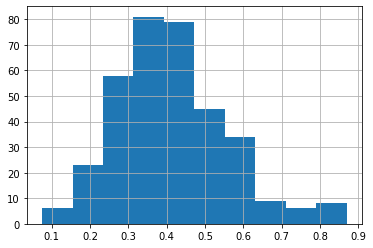

In [94]:
df.total_annual_loss.hist()

<AxesSubplot:>

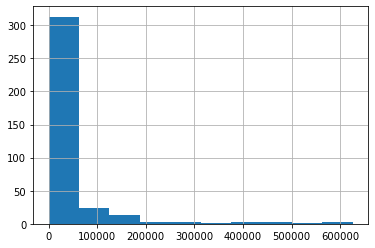

In [95]:
df.colonies.hist()

<AxesSubplot:>

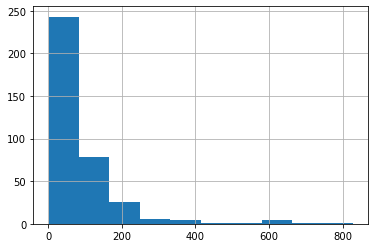

In [96]:
df.beekeepers.hist()

In [97]:
df.describe()

,total_annual_loss,beekeepers,beekeepers_exclusive_to_state,colonies,colonies_exclusive_to_state
count,349.000000,365.000000,365.000000,365.000000,365.000000
mean,0.411450,85.038356,0.854014,37175.526027,0.400003
std,0.143868,107.269526,0.205144,86769.745718,0.390924
min,0.075000,1.000000,0.000000,1.000000,0.000000
25%,0.314000,21.000000,0.838000,952.000000,0.032000
50%,0.398000,53.000000,0.929000,4799.000000,0.207000
75%,0.485000,112.000000,0.969000,33093.000000,0.828000
max,0.869000,828.000000,1.000000,625897.000000,1.000000


In [104]:
df.groupby(['state']).total_annual_loss.mean()

state
alabama                 0.359429
alaska                       NaN
arizona                 0.406143
arkansas                0.376429
california              0.357143
colorado                0.384429
connecticut             0.529714
delaware                0.538000
district_of_columbia    0.623200
florida                 0.455571
georgia                 0.479143
hawaii                  0.198571
idaho                   0.289143
illinois                0.529857
indiana                 0.358000
iowa                    0.601143
kansas                  0.445286
kentucky                0.403143
louisiana               0.400714
maine                   0.482143
maryland                0.500000
massachusetts           0.409143
michigan                0.427429
minnesota               0.451571
mississippi             0.463167
missouri                0.328143
montana                 0.237714
multistateoperation     0.374000
nebraska                0.403143
nevada                  0.315600
new_

In [112]:
bees = pd.read_csv('bee_colony_loss.csv')

In [113]:
bees = bees.drop(columns='Unnamed: 0')

In [114]:
bees

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
0,Alabama,2008,Annual,0,NaN,NaN,0,0,0,NaN,NaN
1,Alaska,2008,Annual,0,NaN,NaN,0,0,0,NaN,NaN
2,Arizona,2008,Annual,0,NaN,NaN,0,0,0,NaN,NaN
3,Arkansas,2008,Annual,0,NaN,NaN,0,0,0,NaN,NaN
4,California,2008,Annual,0,NaN,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7015,West Virginia,2022,Winter,27,54.26195426,53.15801429,427,261,220,100.0,100.0
7016,Wisconsin,2022,Winter,99,51.82101977,60.78178057,917,498,463,100.0,100.0
7017,Wyoming,2022,Winter,8,[R],[R],35,[R],[R],100.0,100.0
7018,Non Continental USA,2022,Winter,7,[R],[R],577,[R],[R],100.0,100.0


In [118]:
bees = bees.sort_values(['year','state'], ascending=[False,True])

In [119]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7020 entries, 2184 to 4833
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          7020 non-null   object 
 1   year                           7020 non-null   int64  
 2   season                         7020 non-null   object 
 3   beekeepers                     7020 non-null   int64  
 4   total_loss                     5751 non-null   object 
 5   average_loss                   5751 non-null   object 
 6   starting_colonies              7020 non-null   int64  
 7   colonies_lost                  7020 non-null   object 
 8   ending_colonies                7020 non-null   object 
 9   beekeepers_exclusive_to_state  5751 non-null   float64
 10  colonies_exclusive_to_state    5751 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 658.1+ KB


In [121]:
bees = bees.dropna()

In [124]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5751 entries, 2184 to 4832
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5751 non-null   object 
 1   year                           5751 non-null   int64  
 2   season                         5751 non-null   object 
 3   beekeepers                     5751 non-null   int64  
 4   total_loss                     5751 non-null   object 
 5   average_loss                   5751 non-null   object 
 6   starting_colonies              5751 non-null   int64  
 7   colonies_lost                  5751 non-null   object 
 8   ending_colonies                5751 non-null   object 
 9   beekeepers_exclusive_to_state  5751 non-null   float64
 10  colonies_exclusive_to_state    5751 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 539.2+ KB


In [125]:
bees.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008])

In [126]:
bees.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'MultiStates', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'Non Continental USA', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [127]:
bees.state = bees.state.str.lower().str.replace(' ','_')

In [129]:
bees.season.unique()

array(['Annual', 'Summer', 'Winter'], dtype=object)

In [130]:
bees.season = bees.season.str.lower()

In [135]:
bees.colonies_lost

2184     212
2236     145
2288     161
6864     212
6916     145
        ... 
2491     [R]
4831     834
152     2714
2492     [R]
4832    2564
Name: colonies_lost, Length: 5751, dtype: object

In [137]:
(bees.colonies_lost == '[R]').value_counts()

False    3756
True     1995
Name: colonies_lost, dtype: int64

In [141]:
bees = bees[bees.beekeepers > 10]

In [143]:
bees = bees.drop_duplicates()

In [144]:
bees

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
2184,alabama,2022,annual,33,36.48881239,34.2600962,316,212,369,100.000000,100.000000
2236,alabama,2022,summer,40,23.46278317,25.66032886,401,145,473,100.000000,100.000000
2288,alabama,2022,winter,42,19.05325444,18.19632672,747,161,684,100.000000,100.000000
2187,arkansas,2022,annual,18,51.25448029,53.8678654,152,143,136,94.444444,97.368421
2239,arkansas,2022,summer,22,14.38356164,14.50488992,181,42,250,95.454545,97.790055
...,...,...,...,...,...,...,...,...,...,...,...
147,utah,2008,winter,28,24.78110028,42.1836928,17709,4500,13659,100.000000,100.000000
151,west_virginia,2008,winter,17,51.56620163,30.33375862,3399,1959,1840,94.117647,63.959988
4831,west_virginia,2008,winter,16,35.1305813,27.295408,2174,834,1540,100.000000,100.000000
152,wisconsin,2008,winter,15,33.8319621,48.48923342,6122,2714,5308,93.333333,56.713492


In [149]:
(bees.colonies_lost == '[R]').value_counts()

False    3459
Name: colonies_lost, dtype: int64

In [150]:
bees.year.value_counts()

2014    319
2013    305
2016    300
2017    299
2015    292
2018    280
2019    265
2012    257
2011    254
2022    251
2020    248
2021    234
2010     91
2009     35
2008     29
Name: year, dtype: int64

In [152]:
bees[bees.season=='annual']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
2184,alabama,2022,annual,33,36.48881239,34.2600962,316,212,369,100.000000,100.000000
2187,arkansas,2022,annual,18,51.25448029,53.8678654,152,143,136,94.444444,97.368421
6867,arkansas,2022,annual,17,49.41176471,52.8698967,148,126,129,100.000000,100.000000
2188,california,2022,annual,89,33.2696669,42.81879115,166009,85526,171543,67.415730,25.320314
4528,california,2022,annual,29,36.75285443,35.81139297,123975,73971,127295,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5194,washington,2011,annual,61,36.02693603,38.04790133,340,214,380,100.000000,100.000000
515,west_virginia,2011,annual,25,78.58546169,40.72314661,193,400,109,92.000000,48.704663
5195,west_virginia,2011,annual,23,41.25,36.88173293,94,66,94,100.000000,100.000000
516,wisconsin,2011,annual,50,34.58506521,51.88269922,3773,2413,4564,92.000000,14.020673


In [153]:
bees[bees.state == 'alabama']

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state
2184,alabama,2022,annual,33,36.48881239,34.2600962,316,212,369,100.000000,100.000000
2236,alabama,2022,summer,40,23.46278317,25.66032886,401,145,473,100.000000,100.000000
2288,alabama,2022,winter,42,19.05325444,18.19632672,747,161,684,100.000000,100.000000
2028,alabama,2021,annual,48,47.49744637,51.38264056,644,465,514,100.000000,100.000000
2080,alabama,2021,summer,56,27.20953327,26.88148304,772,274,733,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
5200,alabama,2011,summer,19,8.457711443,25.4217274,298,34,368,100.000000,100.000000
5252,alabama,2011,winter,33,10.82164329,14.9754922,466,54,445,100.000000,100.000000
416,alabama,2010,winter,46,28.91566265,35.65868933,1357,408,1003,95.652174,95.283714
5096,alabama,2010,winter,44,27.83964365,33.87044794,1293,375,972,100.000000,100.000000


In [154]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 2184 to 4832
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3459 non-null   object 
 1   year                           3459 non-null   int64  
 2   season                         3459 non-null   object 
 3   beekeepers                     3459 non-null   int64  
 4   total_loss                     3459 non-null   object 
 5   average_loss                   3459 non-null   object 
 6   starting_colonies              3459 non-null   int64  
 7   colonies_lost                  3459 non-null   object 
 8   ending_colonies                3459 non-null   object 
 9   beekeepers_exclusive_to_state  3459 non-null   float64
 10  colonies_exclusive_to_state    3459 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 324.3+ KB


In [156]:
bees.total_loss = bees.total_loss.astype(float)

In [157]:
bees.average_loss = bees.average_loss.astype(float)

In [159]:
bees.ending_colonies = bees.ending_colonies.astype(int)

In [162]:
bees.colonies_lost = bees.colonies_lost.astype(int)

In [163]:
bees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3459 entries, 2184 to 4832
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3459 non-null   object 
 1   year                           3459 non-null   int64  
 2   season                         3459 non-null   object 
 3   beekeepers                     3459 non-null   int64  
 4   total_loss                     3459 non-null   float64
 5   average_loss                   3459 non-null   float64
 6   starting_colonies              3459 non-null   int64  
 7   colonies_lost                  3459 non-null   int64  
 8   ending_colonies                3459 non-null   int64  
 9   beekeepers_exclusive_to_state  3459 non-null   float64
 10  colonies_exclusive_to_state    3459 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 324.3+ KB
